Import packages

In [1]:
import pandas as pd


In [2]:
import json

Reading in business dataset

In [3]:


with open('yelp_academic_dataset_business.json', 'r') as file:
    data = [json.loads(line) for line in file]

df = pd.DataFrame(data)
print(df.head())

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

Reading in reviews dataset

In [5]:


with open('yelp_academic_dataset_review.json', 'r') as file:
    data = [json.loads(line) for line in file]

df2 = pd.DataFrame(data)
print(df2.head())

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delici

Import packages

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Grouping reviews by star count

In [7]:
stars_review_counts = df.groupby('stars')['review_count'].sum()

Created a barchar showing num of reviews per star rating

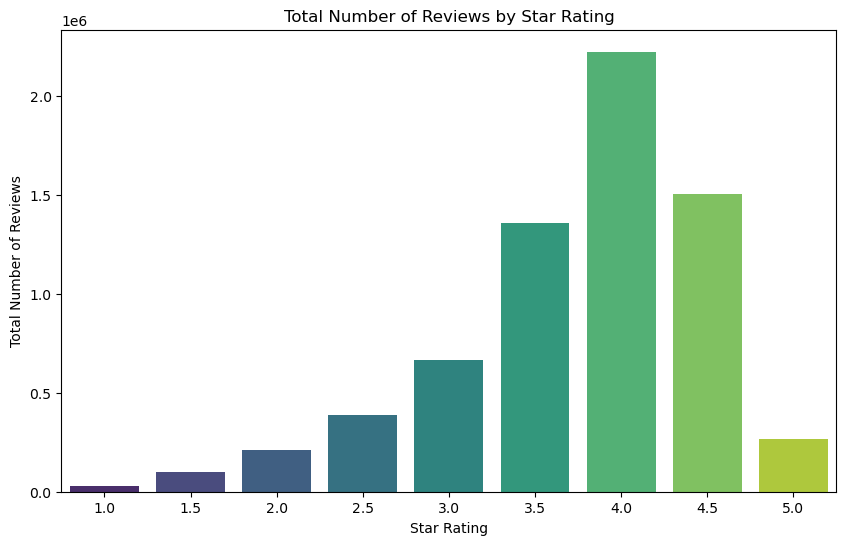

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=stars_review_counts.index, y=stars_review_counts.values, palette='viridis')
plt.xlabel('Star Rating')
plt.ylabel('Total Number of Reviews')
plt.title('Total Number of Reviews by Star Rating')
plt.show()


Package import for wordclouds

In [9]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re


In [10]:
# Ensure stopwords are available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text.lower())  # Remove special characters & lowercase
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Obtain reviews for 1 and 5 stars

In [13]:
# Get text for one-star and five-star reviews
one_star_reviews = ' '.join(df2[df2['stars'] == 1]['text'].apply(preprocess_text))
five_star_reviews = ' '.join(df2[df2['stars'] == 5]['text'].apply(preprocess_text))


Create barchart for 5 most common words

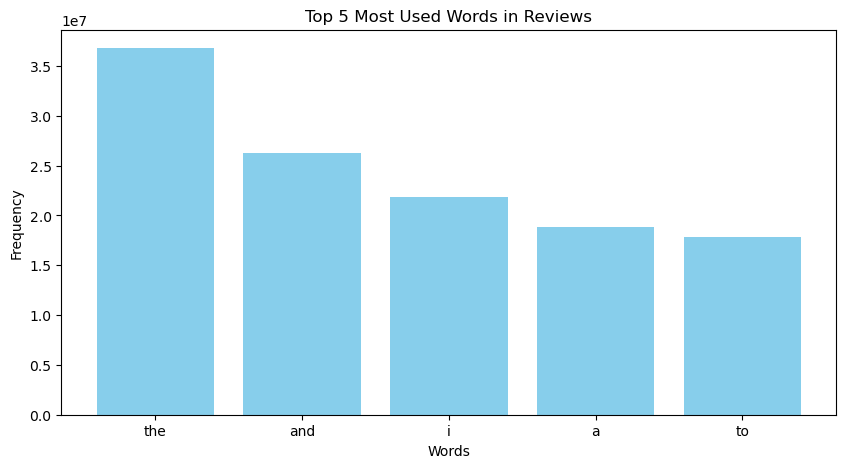

In [26]:
#Initialize Counter
word_counts = Counter()

# Process each review individually
for review in df2['text'].dropna():
    words = re.findall(r'\b\w+\b', review.lower())  # Tokenize and clean
    word_counts.update(words)  # Update word frequency count

# Get top 5 most common words
top_5_words = word_counts.most_common(5)

# Extract words and counts for plotting
words, counts = zip(*top_5_words)

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 5 Most Used Words in Reviews')
plt.show()

Code to create wordcloud for 1 star reviews

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


MemoryError: 

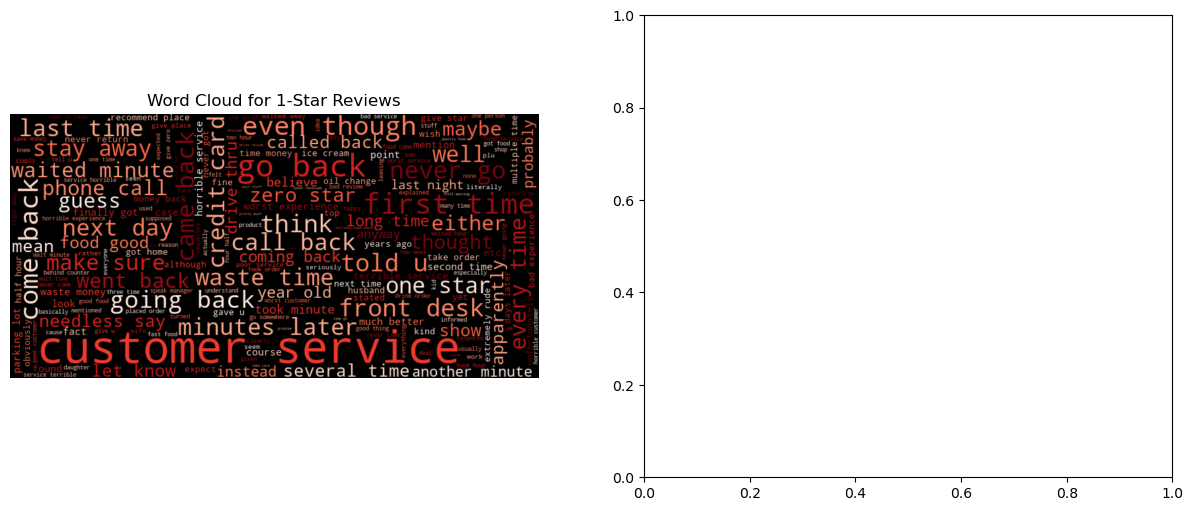

In [ ]:
# Download stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

reviews_df = df2

# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text.lower())  # Remove special characters & lowercase
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Filter one-star and five-star reviews
one_star_reviews = reviews_df[reviews_df['stars'] == 1]['text'].apply(preprocess_text)
five_star_reviews = reviews_df[reviews_df['stars'] == 5]['text'].apply(preprocess_text)

# Generate word clouds separately
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

wordcloud_1 = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate_from_text(' '.join(one_star_reviews))
ax[0].imshow(wordcloud_1, interpolation='bilinear')
ax[0].set_title('Word Cloud for 1-Star Reviews')
ax[0].axis('off')

#wordcloud_5 = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate_from_text(' '.join(five_star_reviews))
#ax[1].imshow(wordcloud_5, interpolation='bilinear')
#ax[1].set_title('Word Cloud for 5-Star Reviews')
#ax[1].axis('off')

plt.show()


Create 5 star wordcloud

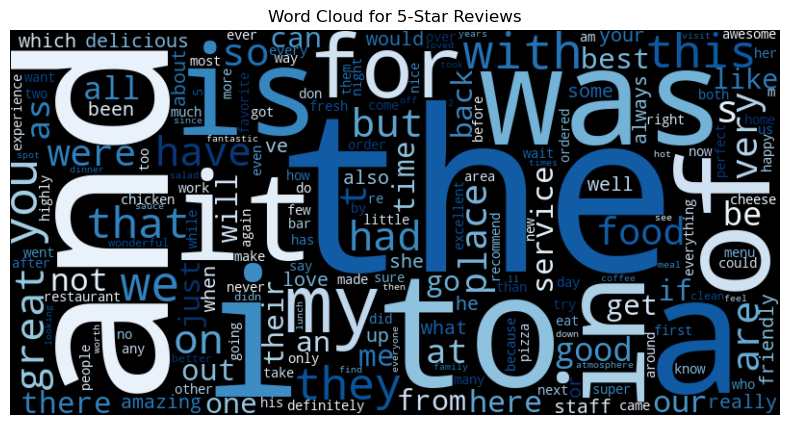

In [33]:

# Function to preprocess and tokenize text efficiently
def tokenize_text(text):
    return re.findall(r'\b\w+\b', text.lower())  # Extract words and lowercase them

# Initialize Counter to store word frequencies
word_freq = Counter()

# Process five-star reviews in chunks
for review in reviews_df.loc[reviews_df['stars'] == 5, 'text'].dropna():
    word_freq.update(tokenize_text(review))  # Update word frequency count

# Generate the word cloud from word frequencies instead of a giant string
wordcloud_5 = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate_from_frequencies(word_freq)

# Plot the word cloud
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(wordcloud_5, interpolation='bilinear')
ax.set_title('Word Cloud for 5-Star Reviews')
ax.axis('off')

plt.show()
